# Law of Large Numbers

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In this notebook, we will experimentally motivate a foundational theorem in probability theory: the Law of Large Numbers.

## Coin Toss Experiment

We'll consider a very basic experiment: flipping a fair coin. Our state space is $\Omega = \{H,T\}$, where $H$ denotes 'heads' and $T$ denotes 'tails'.

Since this is a fair coin, the probability function $P: \mathcal{P}(\Omega) \to \mathbb{R}$ is given by
$$
P(\{H\}) = P(\{T\}) = \frac{1}{2}.
$$

Consider the random variable $X:\Omega \to \mathbb{R}$ given by 'number of heads flipped'. That is,
$$
X(H) = 1 \quad \mbox{and} \quad X(T) = 0.
$$
The probability mass function (pmf) for $X$ is given by 
$$
p_X(t) = \left\{\begin{array}{lr}
\frac{1}{2} & t = 0 \mbox{ or } 1 \\
0 & \mbox{otherwise.} \end{array}\right.
$$

As you have calculated, $\mathbb{E}[X] = \frac{1}{2}$. 

## Law of Large Numbers

### The Empirical Mean

Now suppose you run the experiment $n$ times---i.e., flip the coin $n$ times. Each time you run the experiment, you record the value of $X$ for that iteration, and you take the average after $n$ flips. That is, you record whether the coin landed heads (value of `0`) or tails (value of `1`) in each experiment, and take the mean of all the values you get. 

**Question:** What do you expect this running average to be as $n$ gets large?

Let's test your intuition by running a simulation.

#### Simulating a Coin Toss

The following function simulates a coin toss. It works by:
- generating a random real between 0 and 1
- rounding the result
- turning the resulting 0.0 or 1.0 into an integer 0 or 1.

In [2]:
def toss_coin():
    
    return int(np.round(np.random.rand()))

In [3]:
## Test

result = toss_coin()
if result == 0:
    result_string = '(heads)'
else:
    result_string = '(tails)'
    
print(result, result_string)

0 (heads)


#### Running a Small Simulation

Let's run a simulation where we toss the coin multiple times and keep a running average. We'll start with a small simulation, so that we can eyeball the outputs.

In [4]:
total_n = 10

outcomes = []

# Print table headers with alignment
print(f"{'n':^3} {'outcomes':^40} {'running average':^17}")
print(f"{'-'*3} {'-'*40} {'-'*17}")

# Simulate and print outcomes with formatting
for n in range(total_n):
    outcome = toss_coin()
    outcomes.append(outcome)
    print(f"{n:^3} {str(outcomes):^40} {np.mean(outcomes):^17.2f}")

 n                  outcomes                  running average 
--- ---------------------------------------- -----------------
 0                    [1]                          1.00       
 1                   [1, 1]                        1.00       
 2                 [1, 1, 1]                       1.00       
 3                [1, 1, 1, 0]                     0.75       
 4              [1, 1, 1, 0, 1]                    0.80       
 5             [1, 1, 1, 0, 1, 1]                  0.83       
 6           [1, 1, 1, 0, 1, 1, 1]                 0.86       
 7          [1, 1, 1, 0, 1, 1, 1, 0]               0.75       
 8        [1, 1, 1, 0, 1, 1, 1, 0, 1]              0.78       
 9       [1, 1, 1, 0, 1, 1, 1, 0, 1, 0]            0.70       


#### Longer Simulation

The above illustrates the setup, but it's hard to see a trend in the running average. Let's run the simulation for more iterations and plot the resulting running average.

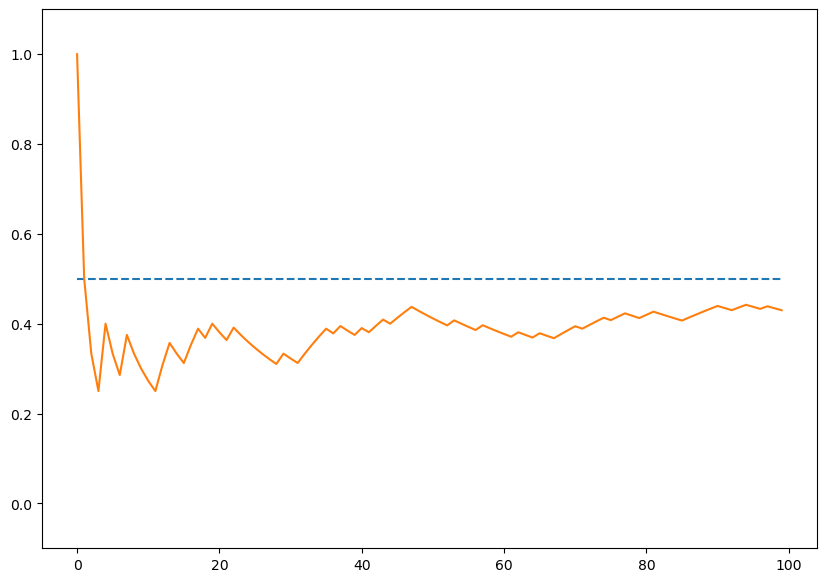

In [5]:
total_n = 100

outcomes = []
running_averages = []

for n in range(total_n):
    outcome = toss_coin()
    outcomes.append(outcome)
    running_averages.append(np.mean(outcomes))
    
plt.figure(figsize = (10,7))
plt.plot([0.5]*total_n,'--')
plt.plot(running_averages)
ax = plt.gca()
ax.set_ylim([-0.1, 1.1])
plt.show()

Let's try running this simulation a few times and plot the results on the same axes.

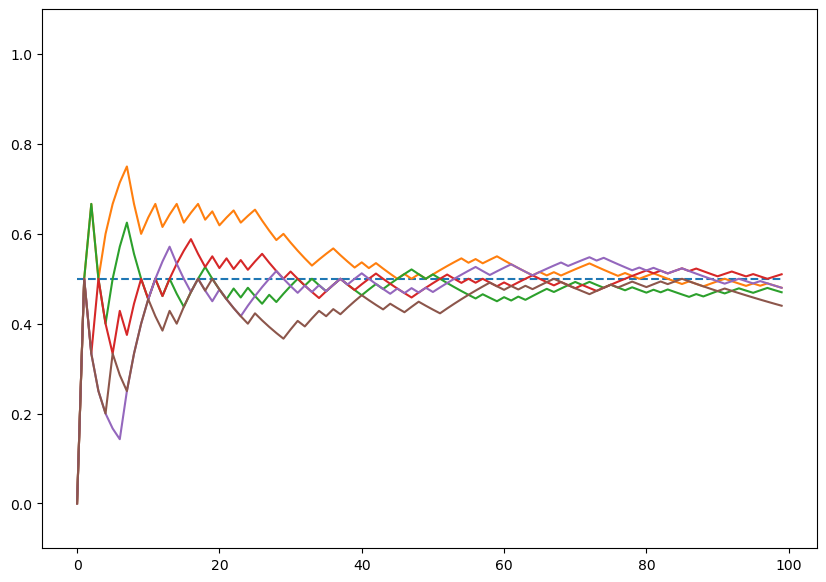

In [6]:
num_runs = 5
total_n = 100

plt.figure(figsize = (10,7))
plt.plot([0.5]*total_n,'--')

for experiment in range(num_runs):
    outcomes = []
    running_averages = []

    for n in range(total_n):
        outcome = toss_coin()
        outcomes.append(outcome)
        running_averages.append(np.mean(outcomes))

    plt.plot(running_averages)
    
ax = plt.gca()
ax.set_ylim([-0.1, 1.1])
plt.show()

Finally, let's try it with a larger number of tosses in each run.

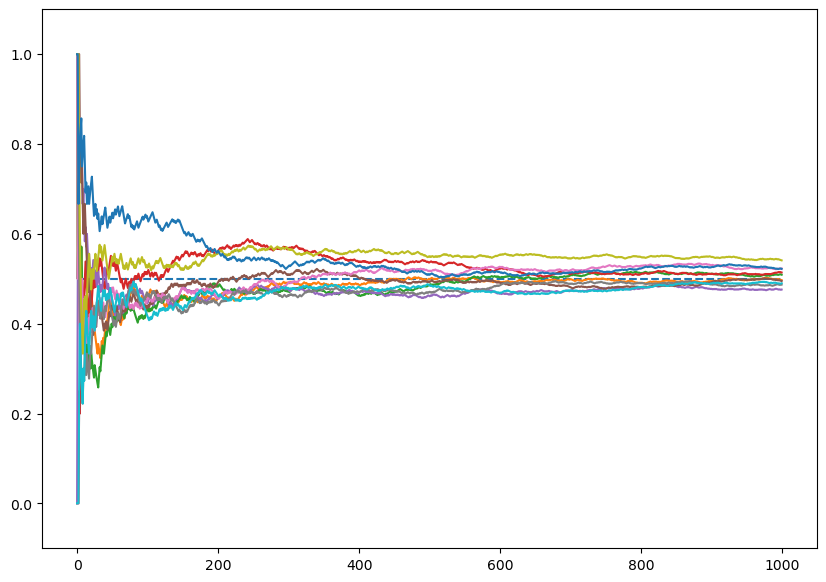

In [7]:
num_runs = 10
total_n = 1000

plt.figure(figsize = (10,7))
plt.plot([0.5]*total_n,'--')

all_running_averages = []

for experiment in range(num_runs):
    outcomes = []
    running_averages = []

    for n in range(total_n):
        outcome = toss_coin()
        outcomes.append(outcome)
        running_averages.append(np.mean(outcomes))

    plt.plot(running_averages)
    all_running_averages.append(running_averages)
    
ax = plt.gca()
ax.set_ylim([-0.1, 1.1])
plt.show()

#### Conclusion

Apparently, the running average converges to the expected value each time. Hopefully, this agrees with your intuition!

This illustrates the **Law of Large Numbers**, which *roughly* says: The running average of the random variable $X$ after $n$ trials limits to $\mathbb{E}[X]$ as $n \to \infty$.  

In fact, the formal statement is about the probability of the running average. So to get a more accurate picture of the Law of Large Numbers, we could also average the results of each experiment above.

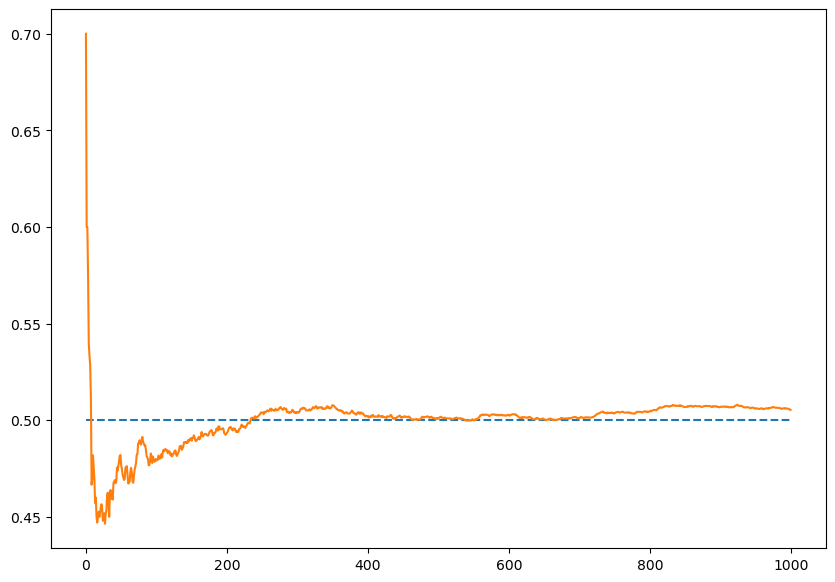

In [8]:
ARA_array = np.array(all_running_averages)

average_of_trials = (1/ARA_array.shape[0])*np.sum(ARA_array,axis=0)

plt.figure(figsize = (10,7))
plt.plot([0.5]*total_n,'--')
plt.plot(average_of_trials)
plt.show()

Increasing the number of trials should give better convergence.

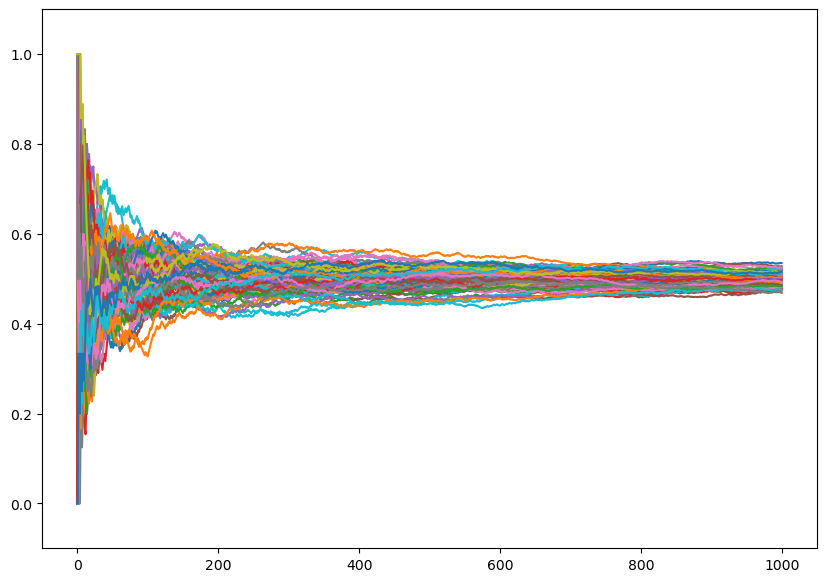

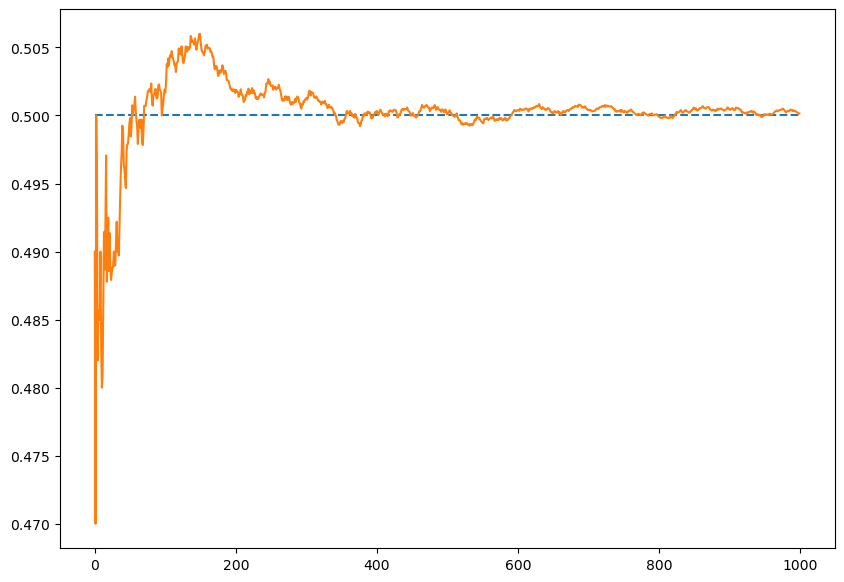

In [9]:
num_runs = 100
total_n = 1000

plt.figure(figsize = (10,7))
plt.plot([0.5]*total_n,'--')

all_running_averages = []

for experiment in range(num_runs):
    outcomes = []
    running_averages = []

    for n in range(total_n):
        outcome = toss_coin()
        outcomes.append(outcome)
        running_averages.append(np.mean(outcomes))

    plt.plot(running_averages)
    all_running_averages.append(running_averages)
    
ax = plt.gca()
ax.set_ylim([-0.1, 1.1])
plt.show()

ARA_array = np.array(all_running_averages)

average_of_trials = (1/ARA_array.shape[0])*np.sum(ARA_array,axis=0)

plt.figure(figsize = (10,7))
plt.plot([0.5]*total_n,'--')
plt.plot(average_of_trials)
plt.show()